# Nearest Neighbor finding

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# scientific units
#from quantities import units
import utils # all datareading and preprocessing functionality

In [2]:
file1 = './data/abstract_set1.txt' # pesticides
file2 = './data/abstract_set2.txt' # cancer-ish
data_selection = 'abstract_clean'
label_selection = 'label'

In [3]:
# the custom class Tokenizer can also lemmatize, and remove short words, digits and stopwords
stopwords = utils.get_stopwords(custom = {'wa', 'use', 'using', 'one', 'two', 'three', 'study'}) 
#custom = {'pesticide', 'pesticides'})

tokenizer = utils.Tokenizer(stop_words=stopwords, min_length=3)
#tokenizer = utils.StemTokenizer()

# this requires TF-IDF
vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_features=3000)
#vectorizer = CountVectorizer(tokenizer=tokenizer) 

In [4]:
data = utils.read_abstract_data(file1, file2)

# no need to catch return value; dataframe operations are in-place
# no need to remove punctuation in this step when using nltk.tokenize_word() 
# which is implemented in utils.tokenize_text()
utils.preprocess_text(data)

data.head()

,pmid,title,abstract,label,text_label,title_clean,abstract_clean
0,29990300,Oxidative stress in triazine pesticide toxicit...,This review article provides a summary of the ...,0,control,oxidative stress in triazine pesticide toxicit...,this review article provides a summary of the ...
1,29990732,Toxicity induced by glyphosate and glyphosate-...,Glyphosate is the active component of many com...,0,control,toxicity induced by glyphosate and glyphosate-...,glyphosate is the active component of many com...
2,29999060,Direct kinetics study of CH2OO + methyl vinyl ...,Methyl vinyl ketone (MVK) and methacrolein (MA...,0,control,direct kinetics study of ch2oo + methyl vinyl ...,methyl vinyl ketone (mvk) and methacrolein (ma...
3,30003825,Dihydromyricetin improves vascular hyporespons...,CONTEXT: Dihydromyricetin (DMY) has oxidation ...,0,control,dihydromyricetin improves vascular hyporespons...,context: dihydromyricetin (dmy) has oxidation ...
4,30015122,Glyphosate and atrazine in rainfall and soils ...,The presence in the atmosphere of glyphosate (...,0,control,glyphosate and atrazine in rainfall and soils ...,the presence in the atmosphere of glyphosate (...


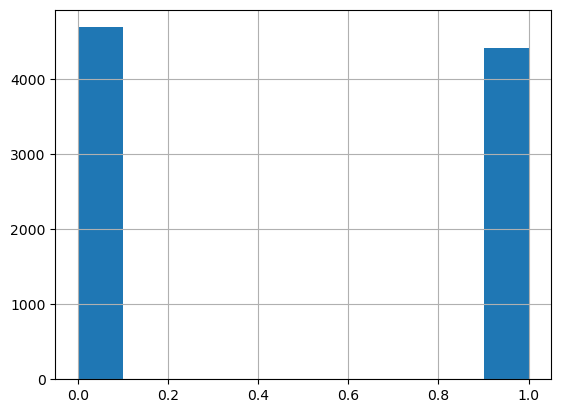

In [5]:
data[label_selection].hist();

In [6]:
# create a data matrix from the overviews
X = vectorizer.fit_transform(data[data_selection])
X

/Users/michielnoback/opt/miniconda3/envs/nlp/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<9110x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 553117 stored elements in Compressed Sparse Row format>

In [7]:
data.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9883, 9884, 9885, 9886, 9887, 9888, 9890, 9891, 9892, 9893],
      dtype='int64', length=9110)

In [8]:
# generate a mapping from paper pubmed id -> index (in df)
paper2idx = pd.Series(data.index, index=data['pmid'])
paper2idx.head()

pmid
29990300    0
29990732    1
29999060    2
30003825    3
30015122    4
dtype: int64

In [9]:
query_pmid = 29990732
query_index = paper2idx[query_pmid]
query_index

1

In [10]:
query = data.loc[query_index]
print(type(query))
print(query)

<class 'pandas.core.series.Series'>
pmid                                                       29990732
title             Toxicity induced by glyphosate and glyphosate-...
abstract          Glyphosate is the active component of many com...
label                                                             0
text_label                                                  control
title_clean       toxicity induced by glyphosate and glyphosate-...
abstract_clean    glyphosate is the active component of many com...
Name: 1, dtype: object


In [11]:
# x_train.loc[query_index]
# this checks out -- the same record

query_vec = X[query_index]
print(query_vec)
# print the query vector
query_vec.toarray()

query_vec

  (0, 887)	0.045542117447258286
  (0, 1040)	0.40673176957621987
  (0, 2530)	0.08874989073173065
  (0, 1272)	0.1754143557805652
  (0, 547)	0.11234142219039345
  (0, 1404)	0.09468259304256584
  (0, 424)	0.2760612674390579
  (0, 1212)	0.48773133644366784
  (0, 56)	0.1657790561116234
  (0, 539)	0.08765369311509442
  (0, 1656)	0.08043445070914824
  (0, 521)	0.09209405282196848
  (0, 2267)	0.1152606851057199
  (0, 353)	0.07998322725836517
  (0, 2948)	0.07462063191806655
  (0, 2407)	0.1263570526259423
  (0, 2137)	0.12209720204385326
  (0, 989)	0.07032046397795697
  (0, 972)	0.08897609769914892
  (0, 655)	0.09868339380228966
  (0, 2994)	0.13580063070738754
  (0, 1586)	0.18471828010034907
  (0, 1887)	0.11924009975943703
  (0, 2304)	0.1567436335273687
  (0, 1704)	0.08676450260268596
  (0, 57)	0.11659012495322928
  (0, 1460)	0.12772570181904172
  (0, 1385)	0.18609235443433292
  (0, 1878)	0.07131037024748461
  (0, 1283)	0.08532872836378598
  (0, 1745)	0.12570448722682492
  (0, 206)	0.1270303378138

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [12]:
# compute similarity between query and every vector in X
scores = cosine_similarity(query_vec, X)
scores

array([[0.14437368, 1.        , 0.01295377, ..., 0.04521846, 0.02326801,
        0.00824854]])

In [13]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()

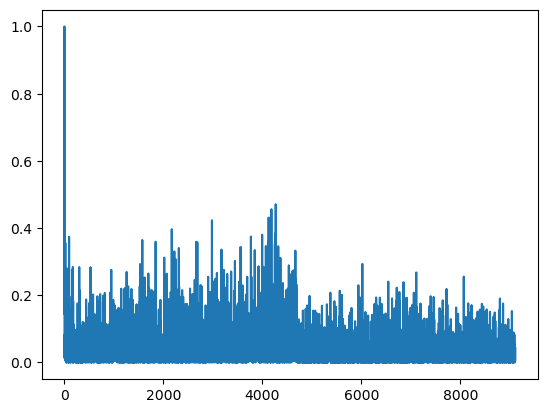

In [14]:
plt.plot(scores);

In [15]:
# compare with euclidean
# scores = euclidean_distances(query_vec, X)
# scores = scores.flatten()
# print(scores)
# plt.plot(scores);
## TODO investigate further

In [16]:
# get top 5 matches
# SHOULD exclude self (similarity between query and itself yields max score)
top_n_papers = 6

# sort the scores
recommended_idx = (-scores).argsort()[:top_n_papers]
print(recommended_idx)
top_scoring_scores = scores[recommended_idx]
print(top_scoring_scores)

[   1 4269 4182 4126 2981 2169]
[1.         0.47079964 0.4561179  0.4314415  0.4232694  0.39666625]


In [17]:
# convert indices back to titles
best_matches_pmids = data['pmid'].iloc[recommended_idx] # fetches a Series
best_matches_titles = data['title'].iloc[recommended_idx] # fetches a Series

best_matches = pd.concat([best_matches_pmids, best_matches_titles], axis=1)#DataFrame(best_matches_titles)

best_matches['score'] = top_scoring_scores
best_matches

,pmid,title,score
1,29990732,Toxicity induced by glyphosate and glyphosate-...,1.000000
4520,36880770,"Evaluation of the herbicide glyphosate, (amino...",0.470800
4432,36379430,Glyphosate mimics 17β-estradiol effects promot...,0.456118
4376,36048159,Transcriptomic signaling in zebrafish (Danio r...,0.431441
3224,27564378,Behavioral responses of juvenile Daphnia magna...,0.423269
2404,20883798,Altered hematological and immunological parame...,0.396666


In [18]:
pmid = 29990732
print(f"Recommendations for {pmid}:")
recommendations = utils.recommend(pmid, data, paper2idx, X, top_n_papers=8)
print(recommendations)

Recommendations for 29990732:
          pmid                                              title     score
4520  36880770  Evaluation of the herbicide glyphosate, (amino...  0.470800
4432  36379430  Glyphosate mimics 17β-estradiol effects promot...  0.456118
4376  36048159  Transcriptomic signaling in zebrafish (Danio r...  0.431441
3224  27564378  Behavioral responses of juvenile Daphnia magna...  0.423269
2404  20883798  Altered hematological and immunological parame...  0.396666
4506  36803739  Glyphosate exposure and preterm birth: A neste...  0.383346
4245  35254617  Derivation of water quality criteria for glyph...  0.380316
4014  33737081  Perinatal exposure to low doses of glyphosate-...  0.374749


In [19]:
utils.print_paper(29990732, data) # input paper

PubMed ID: 29990732

Title: 
Toxicity induced by glyphosate and glyphosate-based herbicides in the zebrafish
hepatocyte cell line (ZF-L).

Abstract:
Glyphosate is the active component of many commonly used herbicides; it can
reach bodies of water through irrigated rice plantations. In the present study,
we evaluated the effect of glyphosate and Roundup® (a glyphosate-based
herbicide) in established culture of the zebrafish hepatocyte cell line ZF-L
after 24 and 48 h of exposure to concentrations of 650 and 3250 µg/L. We
observed a reduction in metabolic activity and lysosomal integrity, and an
increase in cell number after 24 h of Roundup® exposure at the highest
concentration. An increase in active mitochondria and apoptotic cells was
observed following 24 h exposure to glyphosate and Roundup®, while only exposure
to Roundup® induced an increase in necrotic cells. Rhodamine B accumulation
decreased after 48 h exposure to 650 µg/L of Roundup®; this reduction is
indicative of increased 

In [20]:
utils.print_paper(36880770, data)

PubMed ID: 36880770

Title: 
Evaluation of the herbicide glyphosate, (aminomethyl)phosphonic acid, and
glyphosate-based formulations for genotoxic activity using in vitro assays.

Abstract:
Glyphosate, the most heavily used herbicide world-wide, is applied to plants in
complex formulations that promote absorption. The National Toxicology Program
reported in 1992 that glyphosate, administered to rats and mice at doses up to
50,000 ppm in feed for 13 weeks, showed little evidence of toxicity, and no
induction of micronuclei was observed in the mice in this study. Subsequently,
mechanistic studies of glyphosate and glyphosate-based formulations (GBFs) that
have focused on DNA damage and oxidative stress suggest that glyphosate may have
genotoxic potential. However, few of these studies directly compared glyphosate
to GBFs, or effects among GBFs. To address these data gaps, we tested
glyphosate, glyphosate isopropylamine (IPA), and (aminomethyl)phosphonic acid
(AMPA, a microbial metabolite

In [21]:
utils.print_paper(36379430, data)

PubMed ID: 36379430

Title: 
Glyphosate mimics 17β-estradiol effects promoting estrogen receptor alpha
activity in breast cancer cells.

Abstract:
Glyphosate, the active ingredient in several broad-spectrum herbicide
formulations, has been validated and widely used throughout the world. Recent
reports have questioned its safety, showing that glyphosate may act as an
endocrine disruptor by promoting estrogenic activity. However, the molecular
mechanism involved in this phenomenon remains unclear. Therefore, here we aimed
to elucidate the mechanism by which glyphosate induces estrogenic activity using
estrogen-sensitive breast cancer cell line models. Our results show that
glyphosate mimics the cell effects of 17β-estradiol (E2), promoting estrogen
receptor α (ERα) phosphorylation, its degradation, and transcriptional activity
at high concentrations. The molecular mechanism seems involved in the ERα
ligand-binding domain (LBD). Molecular simulations suggest a plausible
interaction betwee

In [22]:
utils.print_paper(36048159, data)

PubMed ID: 36048159

Title: 
Transcriptomic signaling in zebrafish (Danio rerio) embryos exposed to
environmental concentrations of glyphosate.

Abstract:
Glyphosate [N-(phosphonomethyl)glycine] is one of the most popular herbicides
worldwide. Globally, the use of glyphosate is increasing, and its residues have
been found in drinking water and food products. The data regarding the possible
toxic effects of this herbicide are controversial. Therefore, the aim of this
study was to evaluate the effects of glyphosate at environmental concentrations
in zebrafish (Danio rerio) embryos. Embryos were exposed to 0, 1, 100, and
1,000 µg/L glyphosate for 96 h, and mortality, heart rate, and hatching rate
were evaluated. After the experiment, RNA was extracted from the embryos for
transcriptional analysis. No mortality was recorded, and exposure to 100 µg/L
and 1,000 µg/L of glyphosate resulted in lower heart rates at 48 h. In addition,
RNA-seq analysis revealed that glyphosate exposure induced su